## MT09 - TP5 - Automne 2024
### Problèmes aux moindres carrés


#### Exercice 1 - Approximation affine par morceaux

On considère le nuage de $m$ points $(x_i,y_i)_{i=1,...,m}$ suivants donnés par les tableaux $x$ et $y$ du script code python ci-dessous :

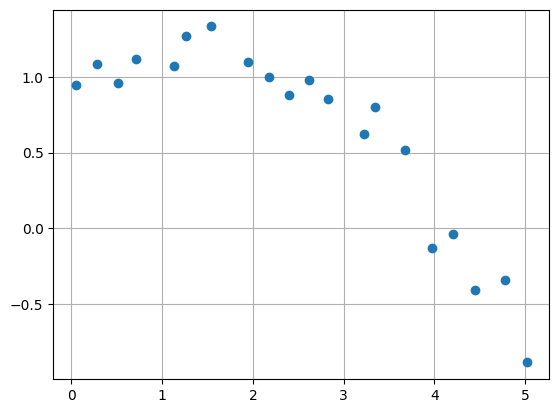

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

m = 20
# Data : 
xi = np.linspace(0.0, 5.0, m) + 0.05*np.random.randn(m)
yi = 0.8 + 0.5*xi-xi**2/6 + 0.2*np.random.randn(m)
plt.plot(xi, yi, 'o'); plt.grid()

On souhaite représenter ce nuage de points par une ligne brisée en minimisant les écarts aux carrés entre les points et la ligne brisée.
Dans un premier temps, coder la fonction dite chapeau ```y = phi(x)``` définie par

$$
\phi(x) = \max(0, 1-|x|).
$$

Représenter graphiquement la fonction $\phi$ sur l'intervalle $[-3,3]$.

[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6
  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4
  3.6  3.8  4. ]


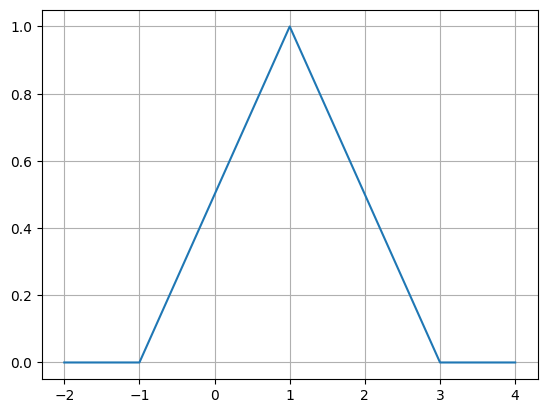

In [62]:
x0=1
x = np.linspace(-3, 3, 31)+x0

L=2
print(x)
def phi(x):
    return np.maximum(0, (L - np.abs(x-x0))/L)

phi_x = phi(x)

plt.plot(x, phi_x)
plt.grid()
plt.show()

(20,)
(20, 10)
(20,)
u = [  1.93095144  -1.5382383    3.22021056  -3.22991436   3.53976134
  -5.79834624   3.18556393  -8.67510701   2.77668005 -13.04832115]


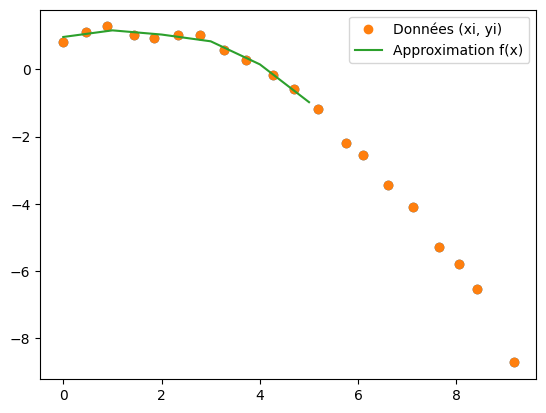

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

m = 20
# Data :
xi = np.linspace(0.0, 9.0, m) + 0.05*np.random.randn(m)
yi = 0.8 + 0.5*xi-xi**2/6 + 0.2*np.random.randn(m)
plt.plot(xi, yi, 'o'); plt.grid()
n = 9
print(np.shape(xi))
A=np.zeros((m,n+1))
for i in range(m):
    for j in range(n+1):
        A[i,j]=phi(xi[i]-j)

ATA = A.T @ A
ATy = A.T @ yi
print(np.shape(A))
print(np.shape(yi))

u = la.solve(ATA, ATy)


print("u =", u)

def f(x, u):
    x = np.array(x)
    val = np.zeros_like(x)
    for j in range(len(u)):
        val += u[j] * phi(x - j)
    return val
xp = np.linspace(0.0, 5.0, 100+1)

plt.plot(xi, yi, 'o', label="Données (xi, yi)")
plt.plot(xp, f(xp,u), '-', label="Approximation f(x)")
plt.grid()
plt.legend()
plt.show()

On cherche ensuite une approximation $f(x)$ de la forme

$$
f(x) = \sum_{j=0}^5 \, u_j\, \phi(x - j),
$$
où les $(u_j)_{j=0,...,5}$ sont les inconnues. Réécrire le problème aux moindres carrés

$$
\min_{(u_0,...,u_5)} \quad \frac{1}{2}\sum_{i=1}^m\, [f(x_i)-y_i]^2
$$

sous la forme

$$
\min_{u\in\mathbb{R}^6} \quad \frac{1}{2} \|Au - y\|^2
$$
en déterminant la matrice $A$. Coder en python la matrice $A$, résoudre les équations normales et tracez sur le même graphique le nuage de points et la fonction d'approximation $f(x)$ ainsi trouvée. Afficher le vecteur $\mathbf{u}$. Comment interprétez-vous les valeurs $u_i$ de $\mathbf{u}$ ?


u = [  3.22324062  -5.00005288   8.87447514 -10.05360611   9.41147811
  -8.16742798]


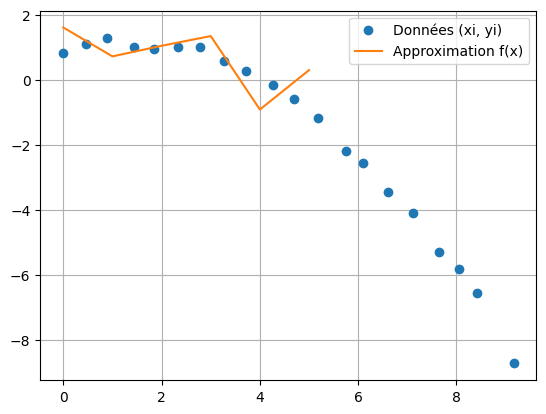

In [64]:
n = 5
A=np.zeros((m,n+1))
for i in range(m):
    for j in range(6):
        A[i,j]=phi(xi[i]-j)

ATA = A.T @ A
ATy = A.T @ yi

u = la.solve(ATA, ATy)
print("u =", u)

def f(x, u):
    x = np.array(x)
    val = np.zeros_like(x)
    for j in range(len(u)):
        val += u[j] * phi(x - j)
    return val
xp = np.linspace(0.0, 5.0, 100+1)

plt.plot(xi, yi, 'o', label="Données (xi, yi)")
plt.plot(xp, f(xp,u), '-', label="Approximation f(x)")
plt.grid()
plt.legend()
plt.show()

#### Exercice 2 - Recherche d'une ellipse passant par un nuage de points

On considère le nuage de points $(x_i,y_i)$, $i=1,...,m$ générés par le script python ci-dessous :

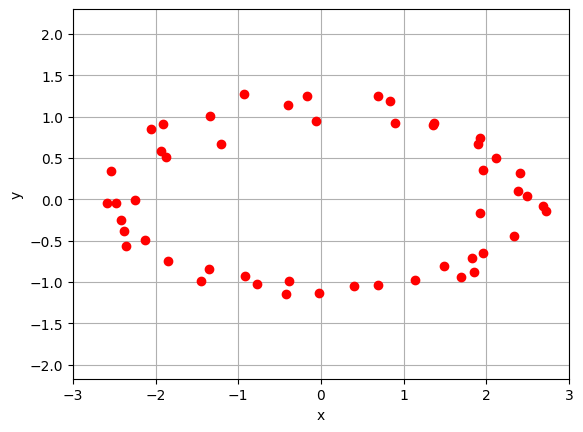

In [65]:
import numpy as np
import matplotlib.pyplot as plt

a = 2.5
b = 1.1
m = 50
theta = np.linspace(0, 2*np.pi, m)
sigma = 0.1
xi = a * (np.cos(theta) + sigma*np.random.randn(m))
yi = b * (np.sin(theta) + sigma*np.random.randn(m))
plt.plot(xi, yi, 'or'); plt.axis("equal"); plt.grid()
plt.xlim([-3, 3]); plt.xlabel('x'); plt.ylabel('y');

Par ces points, on va essayer de faire passer "au mieux' une ellipse de paramètres d'axe
$\hat a$ et $\hat b$, d'équation 

$$
\frac{x^2}{\hat a^2} + \frac{y^2}{\hat b^2} = 1
$$

ou, de manière équivalente, d'équations paramétrées

$$
\begin{array}{l}
x(\theta) = \hat a \cos(\theta), \\
y(\theta) = \hat b \sin(\theta), \quad \theta\in[0, 2\pi].
\end{array}
$$

On pourrait chercher $(\hat a,\hat b)$ qui réalisent le minimum de

$$
\min_{(a,b)} \quad \frac{1}{2} \sum_{i=1}^m \left[ \frac{x_i^2}{\hat a^2} + \frac{y_i^2}{\hat b^2}-1\right]^2
$$

mais ce problème ne peut pas être mis sous la forme $\min_u \frac{1}{2} \|Au-b\|^2$. On considère plutôt le problème aux moindres carrés

$$
\min_{u=(u_1,u_2)} \quad \frac{1}{2} \sum_{i=1}^m \left[ x_i^2\, u_1 + y_i^2\, u_2 -1\right]^2
$$
puis on affectera $\hat a = \frac{1}{\sqrt{u_1}}$ et $\hat b = \frac{1}{\sqrt{u_2}}$. Ecrire ce problème de minimisation sous la forme

$$
\min_u \quad \frac{1}{2}\, \|Au-b\|^2
$$

où l'on déterminera la matrice $A$ et le second membre $b$. Résoudre les équations normales, calculer
$\hat a$ et $\hat b$. Sur le même graphique, tracer le nuage de points $(x_i,y_i)$ et l'ellipse de pramètres
d'axe $\hat a$ et $\hat b$.

u = [0.16229302 0.75098439]
a_axe = 2.482276054360856
b_axe = 1.1539435011403967


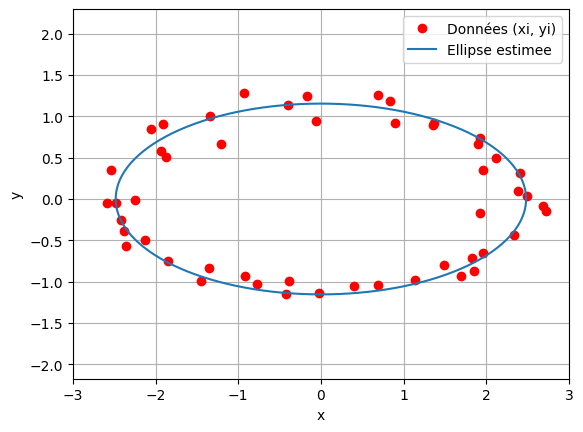

In [66]:
import numpy as np
import matplotlib.pyplot as plt

A = np.zeros((m, 2))
A[:, 0] = xi**2
A[:, 1] = yi**2
b_vec = np.ones(m)

ATA = A.T @ A
ATb = A.T @ b_vec

u = np.linalg.solve(ATA, ATb)
u1, u2 = u
print("u =", u)

aaxe = 1.0 / np.sqrt(u1)
baxe = 1.0 / np.sqrt(u2)

print("a_axe =", aaxe)
print("b_axe =", baxe)

theta = np.linspace(0, 2*np.pi, 400)
x_theta = aaxe * np.cos(theta)
y_theta = baxe * np.sin(theta)


plt.plot(xi, yi, 'or', label='Données (xi, yi)')
plt.plot(x_theta, y_theta, '-', label='Ellipse estimee')
plt.axis("equal")
plt.xlim([-3, 3])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


#### Exercice 3. Moindres carrés avec régularisation de Tykhonov.

Soit $L=3$. On considère le nuage de points $(x_i,y_i)$, $i=1,...,m$ avec $x_i\in [0,L]\ \forall i$ tel que défini ci-dessous :

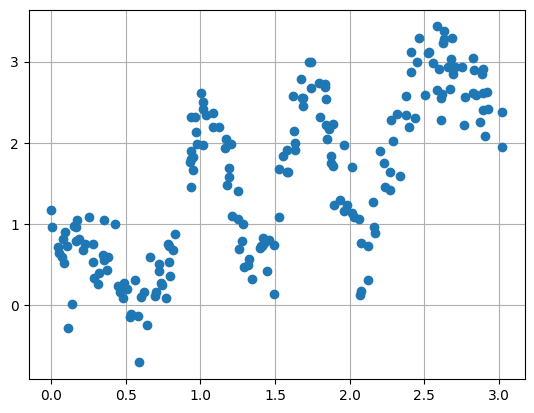

In [67]:
import numpy as np
import matplotlib.pyplot as plt
m = 200
# Data : 
L = 3.0
xi = np.linspace(0.0, L, m) + 0.05*np.random.randn(m)
yi = 0.8 + 0.5*xi-np.sin(3*np.pi*np.cos(xi)) + 0.3*np.random.randn(m)
plt.plot(xi, yi, 'o'); plt.grid()

On réutilise la fonction $\phi$ de l'Exercice 1. Soit $n\leq m-1$ et $\mu$ un scalaire positif ou nul. On considère la fonction de régression affine par morceau

$$
f(x) = \sum_{j=0}^n u_j\, \phi(x - \frac{j}{n}L)
$$

et le problème de minimisation régularisé

$$
\min_{\mathbf{u}}\quad \frac{1}{2} \sum_{i=1}^m \Big[ f(x_i)-y_i \Big]^2
+ \frac{1}{2} \mu \sum_{i=1}^m u_i^2.
$$

Réécrire le problème de miminimisation sous la forme

$$
\min_{\mathbf{u}}\quad \frac{1}{2} \| A\mathbf{u} - \mathbf{y}\|_2^2
+\frac{1}{2}\mu\, \|\mathbf{u}\|_2^2.
$$

Pour la mise en oeuvre, on considèrera $\mu = 10^{-15}$ et $n=80$.
Codez la matrice $A$ et résoudre les équations normales associées au problème de minimisation.
Afficher la valeur de $\|\mathbf{u}\|_2$.

In [68]:
mu=1e-15
n=80
A=np.zeros((m,n+1))
for i in range(m):
    for j in range(n+1):
        A[i,j]=phi(xi[i]-(j/n)*L)

ATA = A.T @ A
ATy = A.T @ yi

u = np.linalg.solve(ATA + mu * np.eye(n+1), ATy)
print("u =", u)

norm2_u = np.linalg.norm(u, 2)
print("||u||_2 =", norm2_u)

u = [ 6.13848652e+00 -5.61156569e+00  2.92460290e+00  4.07267898e+00
  9.59139270e+00 -5.43256997e+00  6.92342180e+00 -4.21353826e+00
 -3.75607451e+00 -1.22617415e+01 -1.15908796e+01  2.04494145e+01
  7.81832865e+00 -5.83057654e+01  3.10329347e+01  1.16034097e+00
  6.90723980e+00 -1.45892495e+01  2.25419908e+01 -2.05137298e+01
  3.92853533e+01 -3.23700145e+01  3.66259425e+01 -3.37567198e+00
 -1.72907997e+01 -8.90322961e+00  9.33809583e+00 -1.06272628e+00
  4.48454120e+01 -7.19949330e+01  5.36567322e+00 -1.94456083e+01
  5.01730457e+01 -2.24788821e+01 -1.81759979e+01  8.17243951e+01
 -1.22194730e+02  7.62766356e+01 -3.37508794e+01  4.93056037e+01
 -4.92240238e+01  2.79238041e+01  1.48673201e+01 -4.44196174e+01
  4.65969687e+01 -4.39460935e+01  6.81990238e+01 -7.40831507e+01
  4.35023979e+01 -7.61742522e+00 -3.51385333e-01 -1.04583309e+01
  6.93048190e+01 -1.19288016e+02  5.78225394e+01 -1.42115210e+01
 -3.72083352e+01  1.40415093e+02 -1.41588436e+02  1.01548780e+02
 -1.19225203e+02  6.2

Codez une fonction

```
def f(x, u):
    # ...
```

qui implémente la fonction de régression $f$ avec le vecteur de coefficients $\mathbf{u}$. 

In [69]:
def f(x, u):
    x1 = np.linspace(0, L, n+1)
    val = np.zeros_like(x, dtype=float)
    for j in range(n + 1):
        val += u[j] * phi(x - x1[j])
    return val

Sur le même graphique, tracez le nuage de points ainsi que la fonction de régression.
Affichez aussi la valeur du conditionnement en norme 2 de la matrice $A^T A + \mu I$.

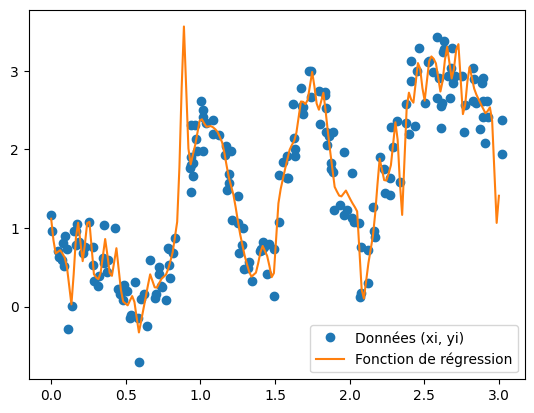

la valeur du conditionnement en norme 2 = 2.9002338553422445e+17


In [70]:
def plot_regression():
    plt.plot(xi, yi, 'o', label='Données (xi, yi)')
    xp=np.linspace(0,L,m)
    plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
    plt.legend()
    plt.show()

plot_regression()

cond = np.linalg.cond(A.T @ A + mu * np.eye(n+1))
print("la valeur du conditionnement en norme 2 =", cond)

In [71]:
Id=np.eye(n+1)
print(np.linalg.cond(A.T@A+mu*Id))

2.9002338553422445e+17


Recommencez en testant différentes valeurs de coefficient de régularisation $\mu$ :
$\mu = 10^{-4}$, $10^{-3}$, $10^{-2}$, $5.10^{-2}$, $10^{-1}$, $1$ et 10. Affichez à nouveau le nuage de points et la fonction de régression résultante. Observez l'influence du coefficient de régularisation sur la régression.

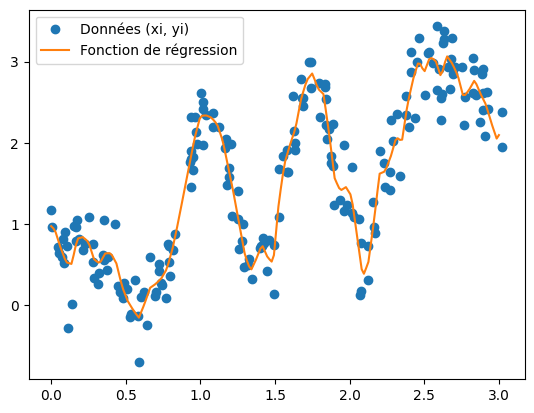

||u||_2 = 101.73045519926289
la valeur du conditionnement en norme 2 = 61726003.52837164


In [72]:
miu=1e-4
u = np.linalg.solve(ATA + miu * np.eye(n+1), ATy)
norm_u = np.linalg.norm(u, 2)
def f(x, u):
        x2 = np.linspace(0, L, n+1)
        val = np.zeros_like(x, dtype=float)
        for j in range(n + 1):
            val += u[j] * phi(x - x2[j])
        return val
cond = np.linalg.cond(A.T @ A + miu * np.eye(n+1))

plt.plot(xi, yi, 'o', label='Données (xi, yi)')
xp=np.linspace(0,L,m)
plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
plt.legend()
plt.show()

print("||u||_2 =", norm_u)
print("la valeur du conditionnement en norme 2 =", cond)

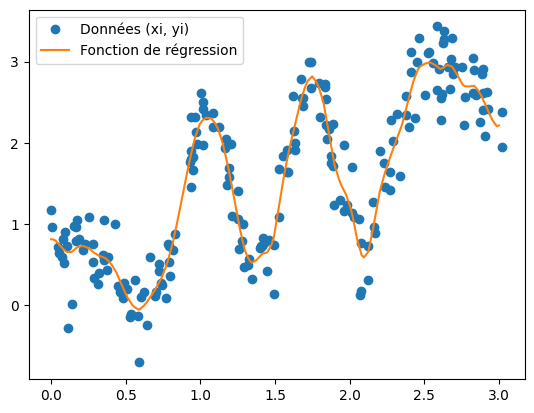

||u||_2 = 41.672704854969
la valeur du conditionnement en norme 2 = 6172601.253944954


In [73]:
miu=1e-3
u = np.linalg.solve(ATA + miu * np.eye(n+1), ATy)
norm_u = np.linalg.norm(u, 2)
def f(x, u):
        x2 = np.linspace(0, L, n+1)
        val = np.zeros_like(x, dtype=float)
        for j in range(n + 1):
            val += u[j] * phi(x - x2[j])
        return val
cond = np.linalg.cond(A.T @ A + miu * np.eye(n+1))

plt.plot(xi, yi, 'o', label='Données (xi, yi)')
xp=np.linspace(0,L,m)
plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
plt.legend()
plt.show()

print("||u||_2 =", norm_u)
print("la valeur du conditionnement en norme 2 =", cond)

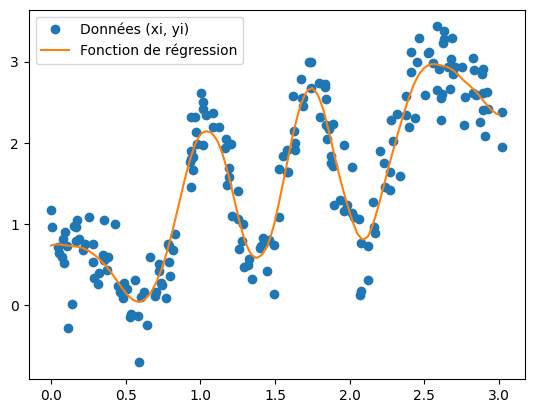

200
||u||_2 = 24.053661784609396
la valeur du conditionnement en norme 2 = 617261.0254072509


In [74]:
miu=1e-2
u = np.linalg.solve(ATA + miu * np.eye(n+1), ATy)
norm_u = np.linalg.norm(u, 2)
def f(x, u):
        x2 = np.linspace(0, L, n+1)
        val = np.zeros_like(x, dtype=float)
        for j in range(n + 1):
            val += u[j] * phi(x - x2[j])
        return val
cond = np.linalg.cond(A.T @ A + miu * np.eye(n+1))

plt.plot(xi, yi, 'o', label='Données (xi, yi)')
xp=np.linspace(0,L,m)
plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
plt.legend()
plt.show()

print("||u||_2 =", norm_u)
print("la valeur du conditionnement en norme 2 =", cond)

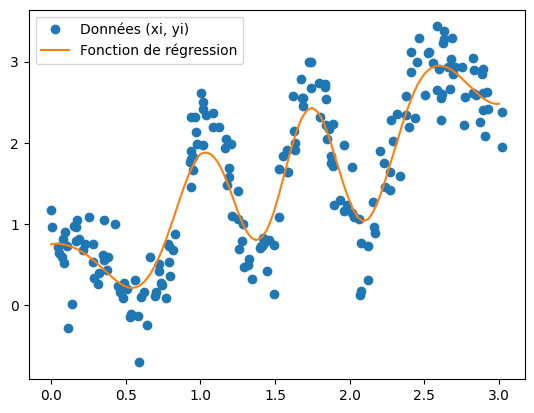

||u||_2 = 16.498322688044432
la valeur du conditionnement en norme 2 = 123453.00508166353


In [75]:
miu=5e-2
u = np.linalg.solve(ATA + miu * np.eye(n+1), ATy)
norm_u = np.linalg.norm(u, 2)
def f(x, u):
        x2 = np.linspace(0, L, n+1)
        val = np.zeros_like(x, dtype=float)
        for j in range(n + 1):
            val += u[j] * phi(x - x2[j])
        return val
cond = np.linalg.cond(A.T @ A + miu * np.eye(n+1))

plt.plot(xi, yi, 'o', label='Données (xi, yi)')
xp=np.linspace(0,L,m)
plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
plt.legend()
plt.show()

print("||u||_2 =", norm_u)
print("la valeur du conditionnement en norme 2 =", cond)

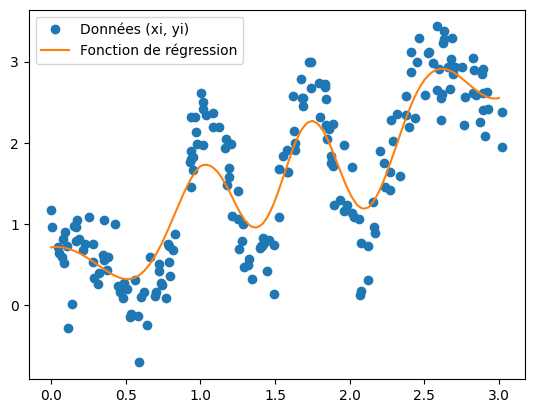

||u||_2 = 12.722651986017002
la valeur du conditionnement en norme 2 = 61727.002540845424


In [76]:
miu=1e-1
u = np.linalg.solve(ATA + miu * np.eye(n+1), ATy)
norm_u = np.linalg.norm(u, 2)
def f(x, u):
        x2 = np.linspace(0, L, n+1)
        val = np.zeros_like(x, dtype=float)
        for j in range(n + 1):
            val += u[j] * phi(x - x2[j])
        return val
cond = np.linalg.cond(A.T @ A + miu * np.eye(n+1))

plt.plot(xi, yi, 'o', label='Données (xi, yi)')
xp=np.linspace(0,L,m)
plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
plt.legend()
plt.show()

print("||u||_2 =", norm_u)
print("la valeur du conditionnement en norme 2 =", cond)

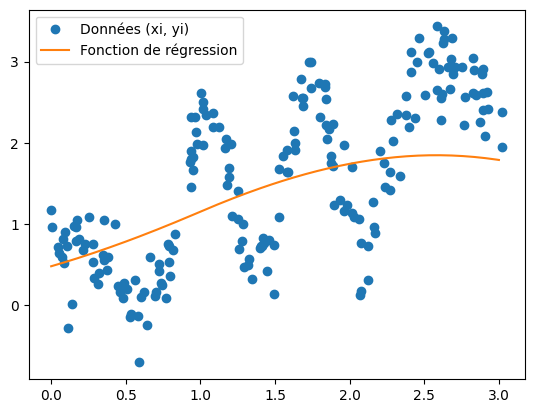

||u||_2 = 0.26991048778773075
la valeur du conditionnement en norme 2 = 7.172600254085813


In [77]:
mu=1e3
u = np.linalg.solve(ATA + mu * np.eye(n+1), ATy)
norm_u = np.linalg.norm(u, 2)
def f(x, u):
        x2 = np.linspace(0, L, n+1)
        val = np.zeros_like(x, dtype=float)
        for j in range(n + 1):
            val += u[j] * phi(x - x2[j])
        return val
cond = np.linalg.cond(A.T @ A + mu * np.eye(n+1))

plt.plot(xi, yi, 'o', label='Données (xi, yi)')
xp=np.linspace(0,L,m)
plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
plt.legend()
plt.show()

print("||u||_2 =", norm_u)
print("la valeur du conditionnement en norme 2 =", cond)

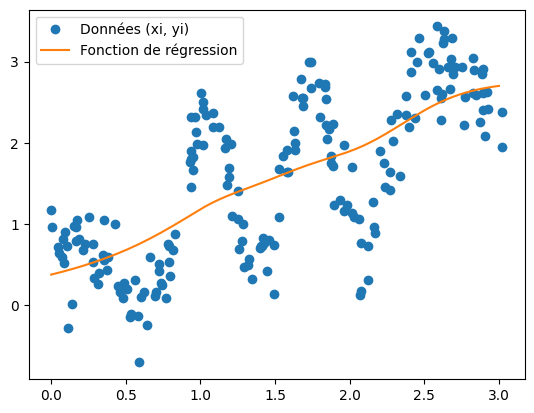

||u||_2 = 0.666143570841358
la valeur du conditionnement en norme 2 = 618.2600254085801


In [78]:
miu=10
u = np.linalg.solve(ATA + miu * np.eye(n+1), ATy)
norm_u = np.linalg.norm(u, 2)
def f(x, u):
        x2 = np.linspace(0, L, n+1)
        val = np.zeros_like(x, dtype=float)
        for j in range(n + 1):
            val += u[j] * phi(x - x2[j])
        return val
cond = np.linalg.cond(A.T @ A + miu * np.eye(n+1))

plt.plot(xi, yi, 'o', label='Données (xi, yi)')
xp=np.linspace(0,L,m)
plt.plot(xp, f(xp, u), '-', label='Fonction de régression')
plt.legend()
plt.show()

print("||u||_2 =", norm_u)
print("la valeur du conditionnement en norme 2 =", cond)

#### Exercice 4 (optionnel) - Identification de paramètres d'un système masse-ressort

On considère ici un système masse-ressort linéaire avec amortissement, $m_0$ est la masse, $k$ est le coefficient de raideur du ressort et $a$ est le coefficient d'amortissement. Le mouvement du point matériel est gouverné par l'équation différentielle du second ordre:

$$
m_0\, \ddot{x}(t) + a\, \dot x(t) + k\, x(t) = 0
$$

où $x(t)$ représente la position de la masse au temps $t$.
L'équation caractéristique correspondante est:

$$
r^2 + \frac{a}{m} r + \frac{k}{m} = 0
$$

avec le discriminant $\Delta$ fonction de $m_0$, $k$ et $a$ :

$$
\Delta = \left(\frac{a}{m_0}\right)^2 - 4 \frac{k}{m_0}.
$$

On suppose $\Delta<0$, si bien que la masse à un mouvement oscillatoire amorti. Sans conditions initiales, la solution générale est de la forme

$$
x(t) = A\, \exp(-\frac{a}{2m}t)\, \cos(\frac{\sqrt{-\Delta}}{2} t) 
+ B\, \exp(-\frac{a}{2m}t)\, \sin(\frac{\sqrt{-\Delta}}{2} t) 
$$

avec deux constantes réelles arbitraires $A$ et $B$. 

Dans la suite, on considère $m=1$, $a=0.4$ et $k=11$ et on suppose $A=1$ et $B=0$ correspondant à $x(0)=1$ et $\dot x(0) = -0.2$. La solution est donc

$$
x(t) = \exp(-\frac{a}{2m}t)\, \cos(\frac{\sqrt{-\Delta}}{2} t).
$$

Sur brouillon, calculez $\dot x(t)$ et $\ddot x(t)$. Ecrire une fonction 

```
x, xdot, xdotdot = xressort(t)
``` 

qui retourne les valeurs $x(t)$, $\dot x(t)$ et $\ddot x(t)$ au temps $t$. Afficher le résultat de
```xressort(0)```.

L'exercice consiste à étudier si, à partir de la connaissance de la position $x(t^n)$, la vitesse $\dot x(t^n)$ et l'accélération $\ddot x(t^n)$ à différents instants $t^n$, **connaissant la masse $m$**, on est en mesure d'identifier les caractéristiques mécaniques du ressort, c'est-à-dire la **raideur $k$** et l'**amortissement $a$**. Pour chaque instant $t^n$, on a donc

$$
\ddot x(t^n) = - \frac{a}{m}\, \dot x(t^n) - \frac{k}{m}\, x(t^n)
$$

Les mesures de $x(t)$, $\dot x(t)$ et $\ddot x(t)$ ont sujettes à des incertitudes de mesures représentées par un bruit gaussien. Considérez le code python ci-dessous pour la génération de données. Dans ce cas,

$$
\ddot x(t^n) \approx - \frac{a}{m}\, \dot x(t^n) - \frac{k}{m}\, x(t^n).
$$

In [79]:
N = 200
t = np.linspace(0, 10, N)
x, xdot, xdotdot = xressort(t)
x = x*(1 + 0.02*np.random.randn(N))
xdot = xdot*(1 + 0.02*np.random.randn(N))
xdotdot = xdotdot*(1 + 0.02*np.random.randn(N))

NameError: name 'xressort' is not defined

On considère le problème aux moindres carrés

$$
\min_{u=(k,a)}\quad \frac{1}{2} \sum_{n=1}^N \left[ \ddot x(t^n) + \frac{a}{m} \dot x(t^n)
+ \frac{k}{m} x(t^n)\right]^2.
$$

Ecrire le problème sous la forme matricielle

$$
\min_{u=(k,a)} \quad \frac{1}{2} \|A u - b\|^2
$$

en déterminant la matrice $A$ et le second membre $b$. Résoudre les équations normales et affichez les valeurs
estimées $(\hat k, \hat a)$ et $k$ et $a$.

Sur le même graphique, tracer la solution exacte $x(t)$ et $\hat x(t)$ correspondant à la solution de paramètres mécaniques estimés $\hat k$ et $\hat a$.